In [2]:
!ls

evaluations


In [1]:
# outputs/gemma are organized like this:
    # mmlu_gemma-2b-it_fs0_100_conversations.csv
    # mmlu_gemma-2b-it_fs0_100_summary.txt
    # mmlu_gemma-2b-it_fs100_100_conversations.csv
    # mmlu_gemma-2b-it_fs100_100_summary.txt
    # mmlu_gemma-2b-it_fs10_100_conversations.csv
    # mmlu_gemma-2b-it_fs10_100_summary.txt
    # mmlu_gemma-2b-it_fs1_100_conversations.csv
    # mmlu_gemma-2b-it_fs1_100_summary.txt
    # mmlu_gemma-2b-it_fs20_100_conversations.csv
    # mmlu_gemma-2b-it_fs20_100_summary.txt
# For every text file, it looks something like this:
    # Score: 0.39
    # other: 0.4
    # other:std: 0.48989794855663565
    # score:std: 0.4877499359302879
    # stem: 0.2857142857142857
    # stem:std: 0.45175395145262565
    # humanities: 0.42857142857142855
    # humanities:std: 0.49487165930539345
    # social_sciences: 0.4166666666666667
    # social_sciences:std: 0.4930066485916347
# Make a dict of the "shot-count" (fs{i} from the filename) and the scores for each category

import os

def get_scores(directory, model_name = None):
    scores = {}
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            if model_name and model_name not in filename:
                continue
            with open(directory + filename, 'r') as f:
                lines = f.readlines()
                score = lines[0].split(': ')[1].strip()
                scores[int(filename.split('_')[2].split('fs')[-1])] = float(score)
    return scores

In [17]:
gemma_scores_2b_mmlu = get_scores('evaluations/outputs/gemma/', '2b')
gemma_scores_2b_mmlu

{100: 0.41,
 0: 0.39,
 4: 0.44,
 50: 0.4,
 2: 0.48,
 10: 0.42,
 1: 0.47,
 30: 0.46,
 20: 0.5,
 3: 0.42,
 5: 0.47}

In [11]:
gemma_scores_7b_mmlu = get_scores('evaluations/outputs/gemma/', '7b')
gemma_scores_7b_mmlu

{3: 0.51,
 1: 0.51,
 100: 0.53,
 0: 0.45,
 20: 0.56,
 10: 0.55,
 4: 0.55,
 50: 0.54,
 2: 0.57,
 30: 0.47,
 5: 0.52}

In [13]:
llama_scores_8b_mmlu = get_scores('evaluations/outputs/llama/', '8b')
llama_scores_8b_mmlu

{20: 0.51, 4: 0.53, 5: 0.55, 3: 0.48, 10: 0.6, 0: 0.61, 2: 0.52, 1: 0.53}

In [15]:
mistral_scores_8b_mmlu = get_scores('evaluations/outputs/mistral/', '7b')
mistral_scores_8b_mmlu

{5: 0.48, 10: 0.53, 20: 0.52, 3: 0.47, 0: 0.42, 1: 0.44, 2: 0.51, 4: 0.43}

In [42]:
llama_70b_mmlu = get_scores('evaluations/outputs/llama_70b/', '70b')
llama_70b_mmlu

{1: 0.79, 3: 0.8, 2: 0.79, 10: 0.79, 5: 0.78, 20: 0.76, 4: 0.79, 0: 0.8}

In [61]:
mistral_8x7b_mmlu = get_scores('evaluations/outputs/llama_70b/', 'mistral')
mistral_8x7b_mmlu

{0: 0.65, 3: 0.59, 5: 0.63, 20: 0.61, 10: 0.64, 2: 0.65, 1: 0.62, 4: 0.6}

In [3]:
# Plot all of these
from matplotlib import pyplot as plt

def plot_scores(scores_dict, model_name):
    # Sort it
    scores_dict = dict(sorted(scores_dict.items()))
    # Ensure that x-axis is integers
    x_vals = [str(v) for v in list(scores_dict.keys())]
    y_vals = list(scores_dict.values())

    plt.plot(x_vals, y_vals, label=model_name)
    plt.xlabel('Shot Count')
    plt.ylabel('Score')
    plt.title('MMLU Scores')
    plt.legend()
    # plt.ylim(0, 1)
    plt.savefig(f'evaluations/images/mmlu_score_{model_name}.png')
    plt.show()

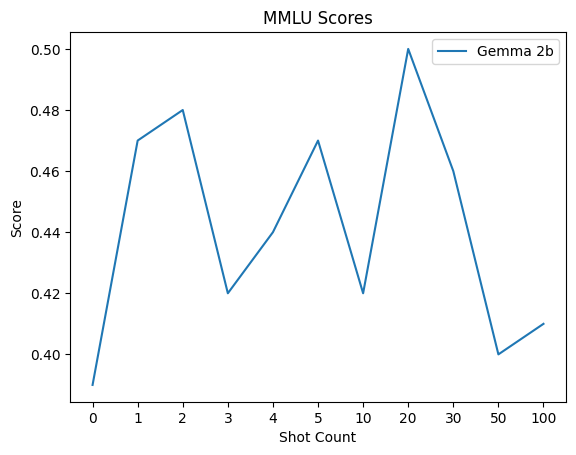

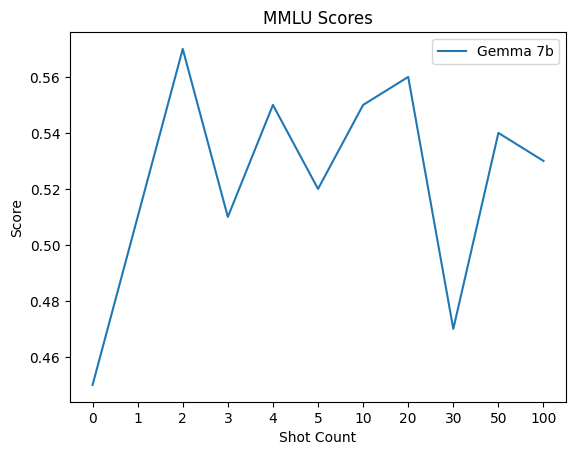

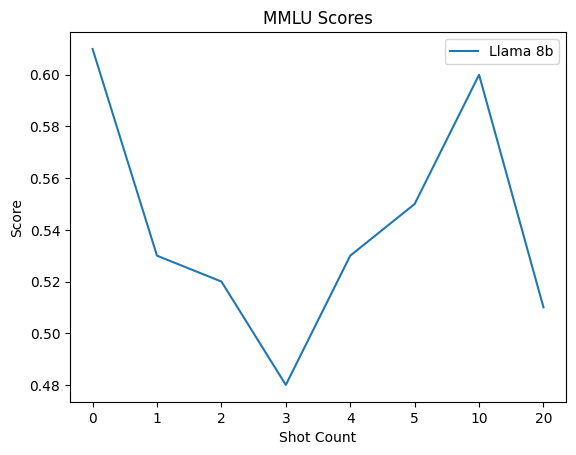

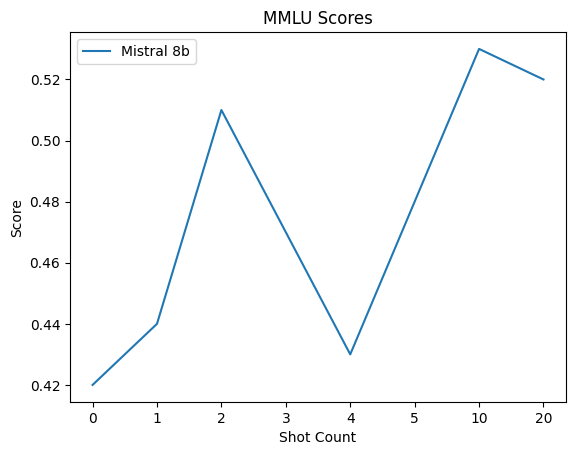

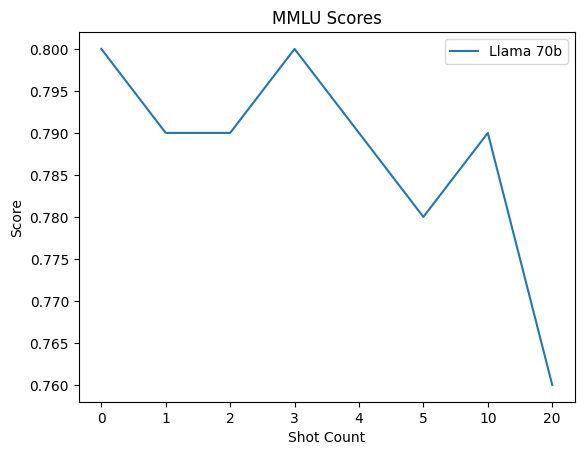

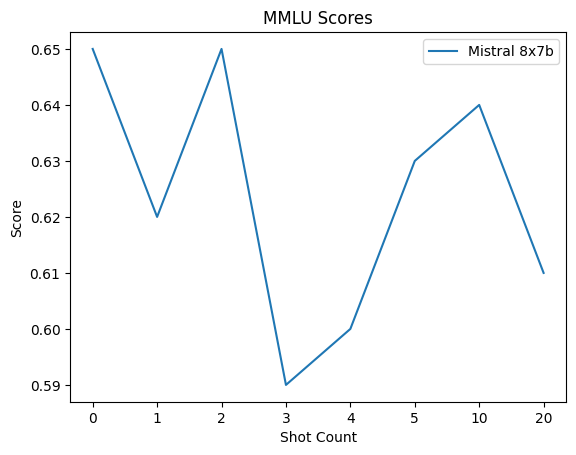

In [69]:


plot_scores(gemma_scores_2b_mmlu, 'Gemma 2b')
plot_scores(gemma_scores_7b_mmlu, 'Gemma 7b')
plot_scores(llama_scores_8b_mmlu, 'Llama 8b')
plot_scores(mistral_scores_8b_mmlu, 'Mistral 8b')
plot_scores(llama_70b_mmlu, 'Llama 70b')
plot_scores(mistral_8x7b_mmlu, 'Mistral 8x7b')
plt.show()

In [25]:
gemma_7b_drop_scores = get_scores('evaluations/outputs/gemma_drop/', '7b')
gemma_7b_drop_scores

{11: 0.3,
 14: 0.35,
 1: 0.03,
 15: 0.46,
 0: 0.03,
 3: 0.18,
 13: 0.27,
 10: 0.32,
 4: 0.18,
 12: 0.35,
 5: 0.29,
 2: 0.18}

In [26]:
llama_8b_drop_scores = get_scores('evaluations/outputs/llama_drop/', '8b')
llama_8b_drop_scores

{4: 0.45,
 0: 0.26,
 3: 0.45,
 11: 0.65,
 12: 0.67,
 5: 0.4,
 2: 0.52,
 1: 0.47,
 10: 0.65}

In [27]:
mistral_7b_drop_scores = get_scores('evaluations/outputs/mistral_drop/', '7b')
mistral_7b_drop_scores

{0: 0.45, 2: 0.54, 3: 0.53, 4: 0.52, 5: 0.5, 10: 0.48, 1: 0.48, 12: 0.46}

In [28]:
gemma_2b_drop_scores = get_scores('evaluations/outputs/gemma2b_drop/', '2b')
gemma_2b_drop_scores

{4: 0.29,
 0: 0.31,
 1: 0.24,
 14: 0.15,
 12: 0.25,
 2: 0.3,
 13: 0.24,
 15: 0.21,
 3: 0.3,
 5: 0.31,
 10: 0.26}

In [30]:
llama70b_drop_scores = get_scores('evaluations/outputs/llama_70b_drop/', '70b')
llama70b_drop_scores

{4: 0.89,
 15: 0.87,
 14: 0.87,
 3: 0.89,
 12: 0.88,
 13: 0.89,
 2: 0.89,
 5: 0.89,
 1: 0.89,
 0: 0.85,
 10: 0.86}

In [38]:
mistral_8x7b_drop_scores = get_scores('evaluations/outputs/mistral_large_drop/', 'mistral')

In [39]:
mistral_8x7b_drop_scores

{2: 0.75,
 3: 0.73,
 13: 0.73,
 0: 0.74,
 15: 0.75,
 4: 0.73,
 1: 0.68,
 10: 0.67,
 5: 0.72,
 12: 0.71,
 14: 0.7}

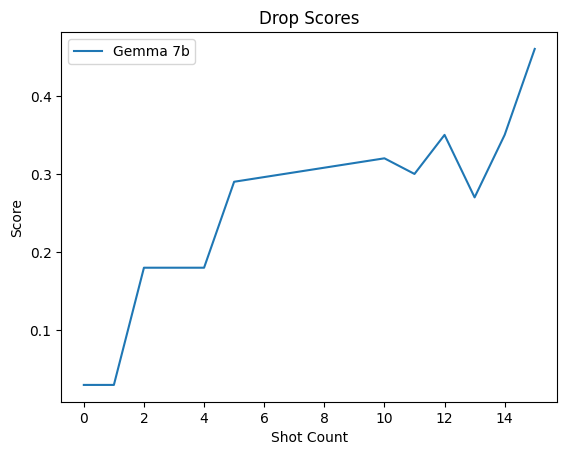

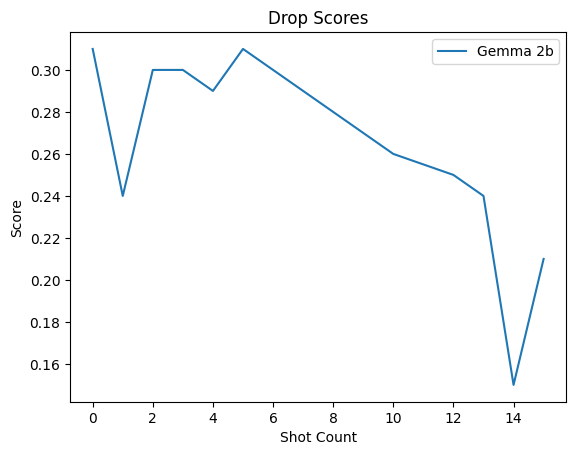

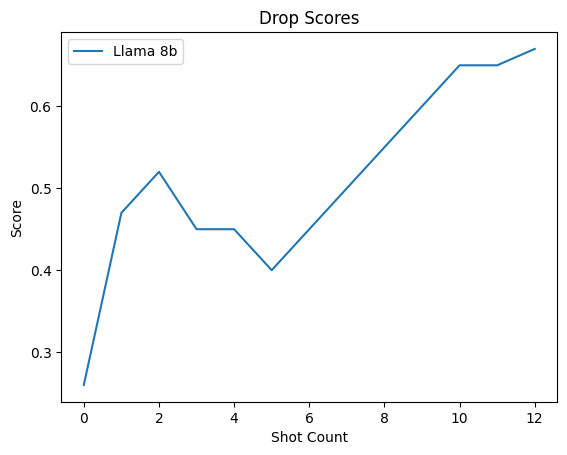

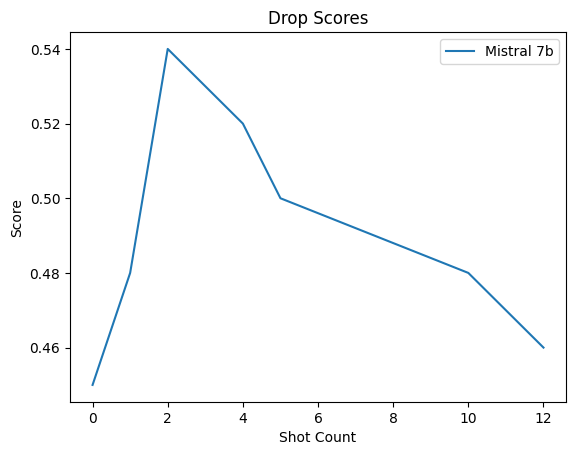

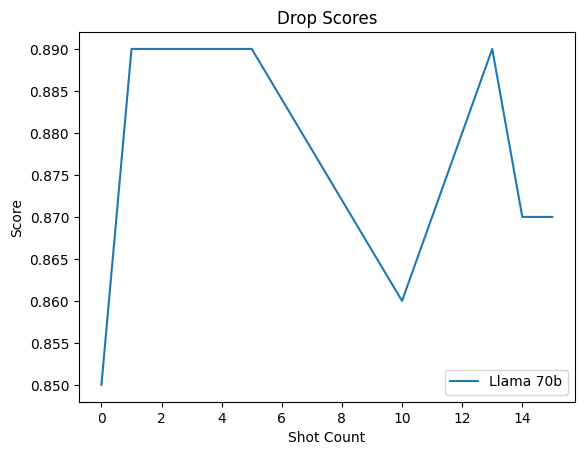

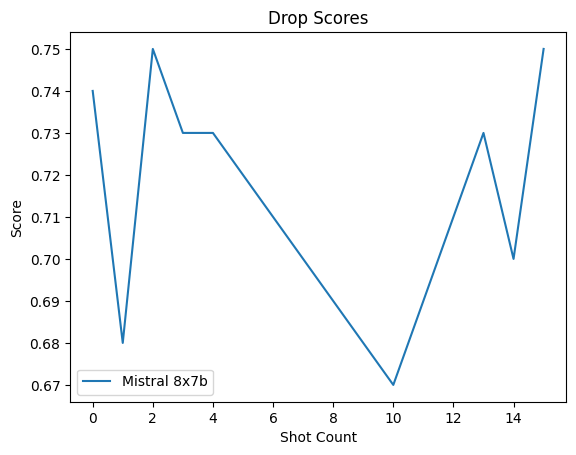

In [68]:
# Plot all of these
def plot_scores(scores_dict, model_name):
    # Sort it
    scores_dict = dict(sorted(scores_dict.items()))
    plt.plot(scores_dict.keys(), scores_dict.values(), label=model_name)
    plt.xlabel('Shot Count')
    plt.ylabel('Score')
    plt.title('Drop Scores')
    # plt.ylim(0, 1)
    plt.legend()
    plt.savefig(f"evaluations/images/drop_score_{model_name}.png")
    plt.show()

plot_scores(gemma_7b_drop_scores, 'Gemma 7b')
plot_scores(gemma_2b_drop_scores, 'Gemma 2b')
plot_scores(llama_8b_drop_scores, 'Llama 8b')
plot_scores(mistral_7b_drop_scores, 'Mistral 7b')
plot_scores(llama70b_drop_scores, 'Llama 70b')
plot_scores(mistral_8x7b_drop_scores, 'Mistral 8x7b')

plt.show()

In [7]:
# New Mistral 7B
new_mistral_7b_mmlu_scores = get_scores('evaluations/corrected_outputs/mistral/mistral-7b/', '7b')
new_mistral_7b_mmlu_scores

{5: 0.53, 10: 0.49, 3: 0.49, 0: 0.38, 1: 0.47, 2: 0.5, 4: 0.51}

In [8]:
# New Mistral 7B
new_mistral_8x7b_mmlu_scores = get_scores('evaluations/corrected_outputs/mistral/mistral-8x7b/', 'mistral')
new_mistral_8x7b_mmlu_scores

{0: 0.63, 3: 0.64, 5: 0.63, 10: 0.65, 2: 0.68, 1: 0.64, 4: 0.62}

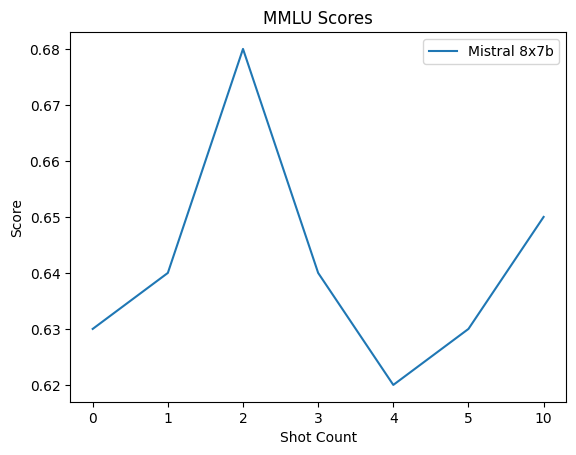

In [9]:
plot_scores(new_mistral_8x7b_mmlu_scores, 'Mistral 8x7b')